# J Del Castillo, B Katz 3-state Ion Channel model

This notebook performs Bayesian inference on the 3-state Ion Channel model from [J. Del Castillo and B. Katz (1957)](http://dx.doi.org/10.1098/rspb.1957.0018), reproducing the results seen in [Calderhead et. al (2013)](http://dx.doi.org/10.1007/978-1-62703-450-0_13).

The Python package [PyMC](https://github.com/pymc-devs/pymc) is used to perform the inference using single chain MCMC.

## Parameters and Priors

The del Castillo and Katz 3-state Ion Channel model has five parameters: $\alpha$, $\beta$, $k_{-1}$, $k_{+1}$ and $X_A$.

We create these as `Stochastic` variables in PyMC with `Uniform` priors:

In [1]:
from pymc import Uniform

alpha = Uniform('alpha', lower=0.01, upper=10000)
beta = Uniform('beta', lower=0.01, upper=10000)
k_1 = Uniform('k-1', lower=0.01, upper=10000)
k_2 = Uniform('k+1', lower=0.1, upper=100)
X_A = Uniform('X_A', lower=0.1, upper=100)

### Q matrix
The `Q` matrix, in `PyMC` terminology, is a `Deterministic` variable, i.e. its value can be calculated as soon as the values of its parents have been determined.

Here we define a function to calculate the `Q` matrix based on the values of the parameters above:

In [2]:
from pymc import deterministic

@deterministic(plot=False)
def Q(alpha=alpha, beta=beta, k_1=k_1, k_2=k_2, X_A=X_A):
    return [ [       -k_1,                k_1,    0.0 ],
             [  k_2 * X_A,  -k_2 * X_A - beta,   beta ],
             [        0.0,              alpha, -alpha ] ]

## Data
The data is observed and its value does not change throughout the simulation.  We use `DCPYPS` to load the data and use it to construct a `PyMC` `Stochastic` object with `observed=True`.

## Likelihood
The likelihood is a function of the data and the parameters. In `HJCFIT` the likelihood function is implemented as a callable Python class, `Log10Likelihood`, and is instantiated with the data in the constructor.  The likelihood object can then be repeatedly called with multiple different `Q` matrices calculated from the parameters.

In `PyMC`, the likelihood function is another `Stochastic` variable. We use the "direct" interface to construct a `Stochastic` variable so we can pass it our `Log10Likelihood` callable.

## Model
The above collection of `Stochastic` and `Deterministic` variables comprises a model in `PyMC`.  We can simply pass a `set` containing the variables to our MCMC sampler.

In [3]:
from pymc import MCMC

mcmc = MCMC(set([data, likelihood, Q, alpha, beta, k_1, k_2, X_A]))

SyntaxError: unexpected EOF while parsing (<ipython-input-3-f6cc955f8ca7>, line 3)

In [10]:
from pymc import MCMC

mcmc = MCMC(model)
mcmc.sample(burn=2000, iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.8 sec

Plotting k-1
Plotting beta
Plotting k+1*X_A
Plotting alpha


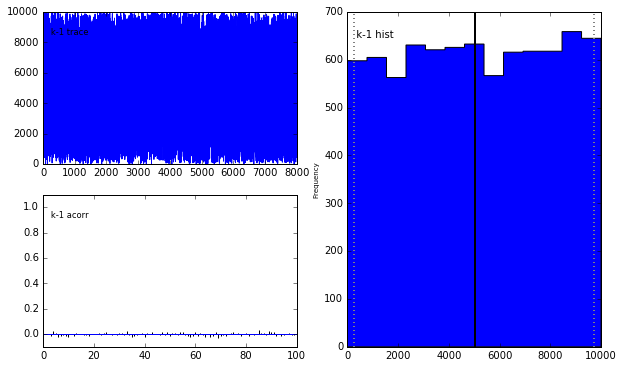

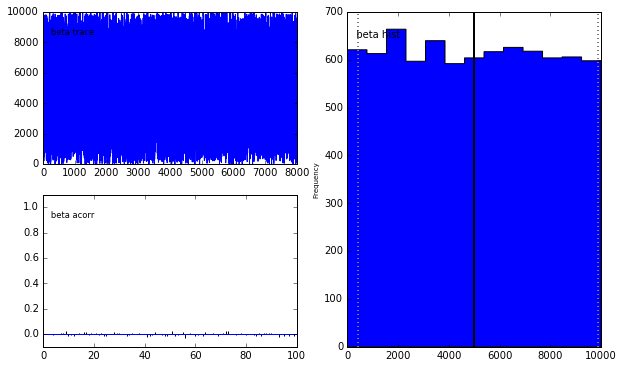

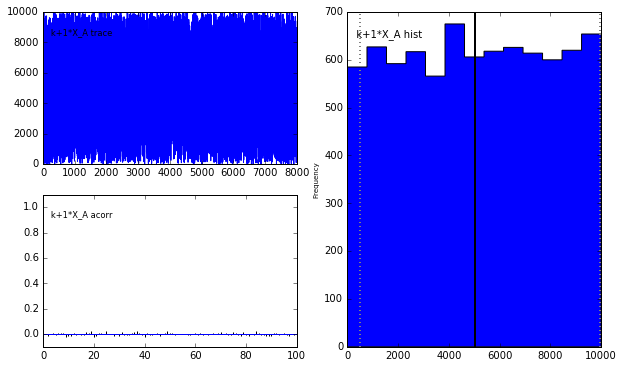

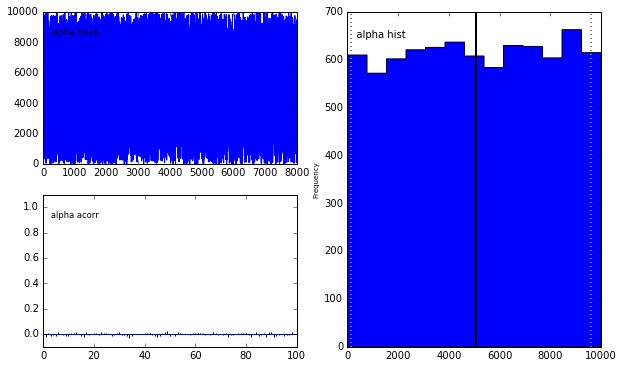

In [11]:
%matplotlib inline
from pymc.Matplot import plot
plot(mcmc)